# 9. Convolutional Neural Networks

A Convolutional Neural Networks is a NN which has at least one layer (``tf.nn.conv2d`` in ``tf``) that does a convolution between its input $f$ and a configurable kernel $k$, $(f*k)$. 

## What is a convolution?

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


sample image shape: (256, 209, 4)


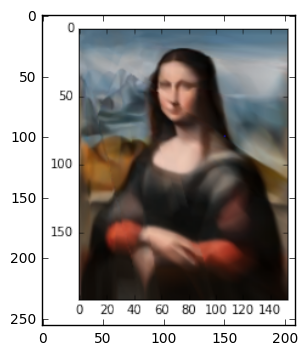

In [1]:
import tensorflow as tf
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = imread("images/result.png")
sample_image= sample_image.astype(float)

size = sample_image.shape
print("sample image shape: "+ str(sample_image.shape))

def show(image):
    image = np.squeeze(image.astype("uint8"))
    plt.imshow(image, cmap="gray")

show(sample_image)

In [2]:
sample_image= sample_image[:,:,:-1]
sample_image.shape

(256, 209, 3)

Let's build a convolution filter that blurs the image using `tf.nn.depthwise_conv2d` (treats each channel separately):

> Convolutions can be $n$-dimensional. For example, given a RGB image $f: \Re^2 \Rightarrow \Re^3$, the convolution kernel can be 3-dimensional, and then $(f * k): \Re^{(3 \times n \times m)} \Rightarrow \Re$, where $n$ and $m$ represent the kernel size.

Given an input tensor of shape ``[batch, in_height, in_width, in_channels]`` and a filter tensor of shape ``[filter_height, filter_width, in_channels, channel_multiplier]`` containing ``in_channels`` convolutional filters of depth 1, ``depthwise_conv2d`` applies a different filter to each input channel (expanding from 1 channel to ``channel_multiplier`` channels for each), then concatenates the results together. 

In [3]:
image = tf.placeholder(tf.float32, shape=(None, None, None, 3))
kernel = tf.placeholder(tf.float32, shape=(5, 5, 3))

def conv(x, k):
    k = tf.reshape(k, shape=(5, 5, 3, 1))
    return tf.nn.depthwise_conv2d(x, 
                                  k, 
                                  strides=(1, 1, 1, 1),
                                  padding='SAME')
    
output_image = conv(image, kernel)
kernel_data = np.zeros(shape=(5, 5, 3)).astype(np.float32)
kernel_data[:, :, :] = 1 / 25.0

# move the channel dimension to the first dimension to
# make it easy to see the spacial organization of the kernel
# on the last 2 dimensions with print:
print(np.transpose(kernel_data, (2, 0, 1))) 

[[[ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]]

 [[ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]]

 [[ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]
  [ 0.04  0.04  0.04  0.04  0.04]]]


(1, 256, 209, 3)


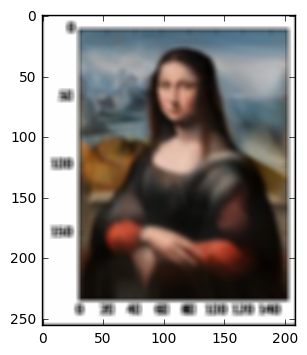

In [6]:
with tf.Session() as sess:
    feed_dict = {image: [sample_image], kernel: kernel_data}
    conv_img = sess.run(output_image, feed_dict=feed_dict)
    print(conv_img.shape)
    show(conv_img[0])

``tf.nn.conv2d``: Given an input tensor of shape ``[batch, in_height, in_width, in_channels]`` and a filter / kernel tensor of shape ``[filter_height, filter_width, in_channels, out_channels]``, this op performs the following:

+ Flattens the filter to a 2-D matrix with shape ``[filter_height * filter_width * in_channels, output_channels]``.
+ Extracts image patches from the input tensor to form a virtual tensor of shape ``[batch, out_height, out_width, filter_height * filter_width * in_channels]``.
+ For each patch, right-multiplies the filter matrix and the image patch vector.

In [19]:
image = tf.placeholder(tf.float32, shape=(None, None, None, 3))
kernel = tf.placeholder(tf.float32, shape=(5, 5, 3))

def conv(x, k):
    k = tf.reshape(k, shape=(5, 5, 3, 1))
    return tf.nn.conv2d(x, 
                        k, 
                        strides=(1, 1, 1, 1),
                        padding='SAME')
    
output_image = conv(image, kernel)
kernel_data = np.zeros(shape=(5, 5, 3)).astype(np.float32)
kernel_data[:, :, :] = 1 / 125.0

# move the channel dimension to the first dimension to
# make it easy to see the spacial organization of the kernel
# on the last 2 dimensions with print:
print(np.transpose(kernel_data, (2, 0, 1))) 

[[[ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]]

 [[ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]]

 [[ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]
  [ 0.008  0.008  0.008  0.008  0.008]]]


(1, 256, 209, 1)


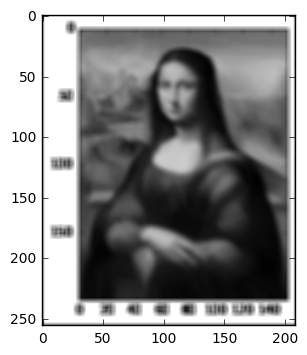

In [20]:
with tf.Session() as sess:
    feed_dict = {image: [sample_image], kernel: kernel_data}
    conv_img = sess.run(output_image, feed_dict=feed_dict)
    print(conv_img.shape)
    show(conv_img[0])

### Exercise

+ What happens if we build a 3x3 kernel with stride 2? What is the size of the output image?


+ When a kernel is overlapped on an image it should be set to fit within the bounds of the image. Filling the missing area of the image is known as *padding* the image. The padding parameter must be ``SAME``  if we want the convolution output to be the same size as the input, and ``VALID`` if we want only the useful part of the output.   
What happens if we change the padding to 'VALID'?

In [26]:
# your code here



## Convolution kernels

> In image processing, a kernel, convolution matrix, or mask is a small matrix. It is useful for blurring, sharpening, embossing, edge detection, and more. This is accomplished by means of convolution between a kernel and an image. (Source: Wikipedia)

Go to: [Kernel Image Processing](https://goo.gl/fqFx1n)

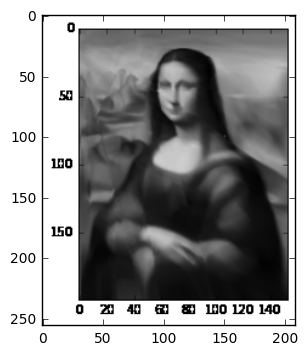

In [8]:
# convert image to greyscale
grey_sample_image = sample_image.sum(axis=2) / 3.

# add the channel dimension even if it's only one channel
grey_sample_image = grey_sample_image[:, :, np.newaxis]

show(grey_sample_image)

[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]
('Resulting image shape:', (1, 256, 209, 1))


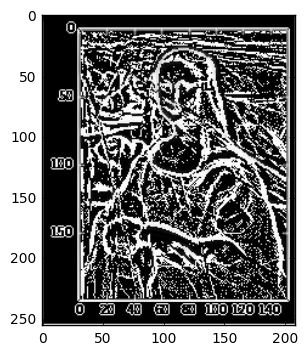

In [30]:
#### image = tf.placeholder(tf.float32, [None, None, None, 1])
kernel = tf.placeholder(tf.float32, [3, 3])

def conv(x, k):
    k = tf.reshape(k, shape=[3, 3, 1, 1])
    return tf.nn.conv2d(x, k, strides=[1, 1, 1, 1],
                        padding='SAME')
    
output_image = conv(image, kernel)

#kernel_data = np.array([
#        [0.0,  0.1, 0.0],
#        [0.0,  0.0, 0.0],
#        [0.0, -0.1, 0.0],
#    ])
kernel_data = np.array([
         [ 0.0,-1.0,  0.0],
         [-1.0,  4.0,  -1.0],
         [0.0, -1.0, 0.0],
     ])
print(kernel_data)

with tf.Session() as sess:
    feed_dict={image:[grey_sample_image], 
               kernel: kernel_data}
    conv_img = sess.run(output_image, feed_dict=feed_dict)
    print("Resulting image shape:", conv_img.shape)
    show(conv_img[0])



## Why are convolutions interesting?

If our input is a *large* image and our model is composed of fully connected layers, the number of parameters of the models is huge! Images present some regularities that allow us to reduce the number of parameters of the model without loosing model expressiveness. 

> Imagine a mid-resolution color image of $256 \times 256$ pixels. If we think of a Multi Layer Perceptron with just one hidden layer of 256 neurons + an output layer of 1
neuron it will have more than **50 million** parameters. Does it make sense? Can we do it better?

One possible solution for this problem is to consider local receptive fields (LRF) (an inspiration that comes from neuroscience). A local receptive field is a standard MLP with a local view of the image: its input is a submatrix $M \times M$ of the original $N \times N$, where $M << N$.

Using LRF is like decomposing the problem of image analysis in a set of local *experts* that are specialized in certain parts of the image. The outcome of these specialists can be integrated at a high level of the model.

> Could you propose a problem where a LRF architecture could be the best option?

Let's suppose we are dealing with a common task: object detection.

In the most general setting, images represent the field of view of a camera (robot, autonomous car, person, etc.). Hence, we cannot assume any prior information about the presence of the object of interest on the image (i.e. any prior information about its scale, point of view, etc. or even its localization with respect to image coordinates). 

> An object may appear at any image coordinates!

In this case LRF are not suited for this task because in order to learn a detector we should provide the model with a lot of examples in order to consider all possible object localitions!

But, what about sharing LRF weights?

If we consider a set of LRF (each one centered on a different pixel of the image) with shared weights, this is equivalent to consider a convolution of the image with a kernel.

> In mathematics (and, in particular, functional analysis) **convolution** is a mathematical operation on two functions (f and g); it produces a third function, that is typically viewed as a modified version of one of the original functions, giving the integral of the pointwise multiplication of the two functions as a function of the amount that one of the original functions is translated. Convolution is similar to cross-correlation. It has applications that include probability, statistics, computer vision, natural language processing, image and signal processing, engineering, and differential equations. (Source: Wikipedia)

> + Convolution is a linear operator.

> + The derivative of a convolution is a convolution of one function with the derivative of the other, i.e. $$y=x∗f \rightarrow y′=x′∗f=x∗f′$$

The kernel weights can be learn from examples.

> CNN are composed of repetitive blocks of neurons that are applied across
space (for images) or time (for audio signals).

> For images, these blocks of neurons can be interpreted as
2D convolutional kernels, repeatedly applied over each
patch of the image.

<img src="images/conv.png" alt="https://community.arm.com/cfs-file/__key/communityserver-blogs-components-weblogfiles/00-00-00-20-66/4786.conv.png" style="width: 500px;"/>


> For speech, they can be seen as the 1D convolutional
kernels applied across time-windows.

<img src="images/spectrogram.png" alt="" style="width: 500px;"/>


At training time, the weights for these repeated blocks are
'shared', i.e. the weight gradients learned over various
image patches are averaged.

CNN where originally proposed in early 90's by Y.LeCun:

<img src="images/conv2.png" alt="" style="width: 700px;"/>


LeNet architecture used one additional ingredient: max pooling. Pooling is a way of sub-sampling, i.e. reducing the dimension of the input. It is usually done after convolutional layers. 

It is also useful since it provides a form of translation invariance. 

## MNIST Convolutional Network 

A simple CNN architecture cambines a convolutional layer (``tf.nn.conv2d``), a non-linear activation function (``tf.nn.relu``), a pooling layer (``tf.nn.max_pool``) and a fully connected layer (``tf.matmul``). 

<img src="images/maxpool.jpeg" alt="" style="width: 400px;"/>
<center>
Max Pooling. Source: http://cs231n.github.io/convolutional-networks/
</center>


The ``tf`` input pipeline is designed to work with multiple images in a batch: `` [image_batch_size, image_height, image_width, image_channels] ``. 

In [40]:
# Adapted notebook from Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [55]:
import tensorflow as tf

# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 20

In [56]:
# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

In [57]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

The parameter ``strides`` causes a kernel to skip over pixels of an image and not to include them in the output. 

Strides are a way to adjust the dimensionality of input tensors (to reduce processing power). This allows the design of CNN with small kernels but getting information from large parts of the input. 

In [58]:
# Create model
def conv2d(img, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(img, w, strides=[1, 1, 1, 1], 
                                                  padding='SAME'),b))

def max_pool(img, k):
    return tf.nn.max_pool(img, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def conv_net(_X, _weights, _biases, _dropout):
    # Reshape input picture
    _X = tf.reshape(_X, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(_X, _weights['wc1'], _biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = max_pool(conv1, k=2)
    # Apply Dropout
    conv1 = tf.nn.dropout(conv1, _dropout)

    # Convolution Layer
    conv2 = conv2d(conv1, _weights['wc2'], _biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = max_pool(conv2, k=2)
    # Apply Dropout
    conv2 = tf.nn.dropout(conv2, _dropout)

    # Fully connected layer
    # Reshape conv2 output to fit dense layer input
    dense1 = tf.reshape(conv2, [-1, _weights['wd1'].get_shape().as_list()[0]]) 
    # Relu activation
    dense1 = tf.nn.relu(tf.add(tf.matmul(dense1, _weights['wd1']), _biases['bd1']))
    # Apply Dropout
    dense1 = tf.nn.dropout(dense1, _dropout) # Apply Dropout

    # Output, class prediction
    out = tf.add(tf.matmul(dense1, _weights['out']), _biases['out'])
    return out

In [59]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])), 
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])), 
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])), 
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes])) 
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [60]:
# Construct model
pred = conv_net(x, weights, biases, keep_prob)

In [61]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [62]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [63]:
# Initializing the variables
init = tf.initialize_all_variables()

In [64]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc)
        step += 1
    print "Optimization Finished!"
    # Calculate accuracy for 256 mnist test images
    print "Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256], 
                                                             y: mnist.test.labels[:256], 
                                                             keep_prob: 1.})

Iter 2560, Minibatch Loss= 11417.519531, Training Accuracy= 0.39062
Iter 5120, Minibatch Loss= 6696.514648, Training Accuracy= 0.62500
Iter 7680, Minibatch Loss= 4698.143555, Training Accuracy= 0.69531
Iter 10240, Minibatch Loss= 2935.180176, Training Accuracy= 0.76562
Iter 12800, Minibatch Loss= 1870.128540, Training Accuracy= 0.85938
Iter 15360, Minibatch Loss= 3555.693359, Training Accuracy= 0.78906
Iter 17920, Minibatch Loss= 2369.992188, Training Accuracy= 0.82812
Iter 20480, Minibatch Loss= 2517.630615, Training Accuracy= 0.81250
Iter 23040, Minibatch Loss= 750.011658, Training Accuracy= 0.89844
Iter 25600, Minibatch Loss= 2186.471436, Training Accuracy= 0.84375
Iter 28160, Minibatch Loss= 1995.216064, Training Accuracy= 0.85938
Iter 30720, Minibatch Loss= 2518.622559, Training Accuracy= 0.80469
Iter 33280, Minibatch Loss= 1659.284912, Training Accuracy= 0.85938
Iter 35840, Minibatch Loss= 1279.156006, Training Accuracy= 0.89062
Iter 38400, Minibatch Loss= 779.161621, Training Ac

Some CNN architectures use *normalization* layers. For example, ``tf.nn.local_response_normalization`` is a function which shapes the output based on a summation operation in the following way: within a given vector, each component is divided by the weighted, squared sum of inputs within a depth radius. 

> In neurobiology, there is a concept called “lateral inhibition”. This refers to the capacity of an excited neuron to subdue its neighbors.

## Visualization of learned kernels.

<img src="images/weights.jpeg" alt="" style="width: 400px;"/>
<center>
Convolution kernels from the first layer.
Source: http://cs231n.github.io/convolutional-networks/
</center>

## Exercise:

Which is the approximate number of parameters of this network?

In [66]:
# Your code here

## Smile Detection using Convolutional Neural Networks

In [67]:
# Adapted from Kyle McDonald
# Project: https://github.com/kylemcdonald/SmileCNN

#Download dataset
#!sudo apt-get install unzip
#!wget https://github.com/hromi/SMILEsmileD/archive/master.zip
#!unzip -q master.zip
#!rm master.zip

In [68]:
#util and imports
import os
import fnmatch
from cStringIO import StringIO
import numpy as np
import PIL.Image
import IPython.display
import shutil

def list_all_files(directory, extensions=None):
    for root, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            base, ext = os.path.splitext(filename)
            joined = os.path.join(root, filename)
            if extensions is None or ext.lower() in extensions:
                yield joined


def show_array(a, fmt='png', filename=None):
    a = np.uint8(np.clip(a, 0, 255))
    image_data = StringIO()
    PIL.Image.fromarray(a).save(image_data, fmt)
    if filename is None:
        IPython.display.display(IPython.display.Image(data=image_data.getvalue()))
    else:
        with open(filename, 'w') as f:
            image_data.seek(0)
            shutil.copyfileobj(image_data, f)

def find_rectangle(n, max_ratio=2):
    sides = []
    square = int(math.sqrt(n))
    for w in range(square, max_ratio * square):
        h = n / w
        used = w * h
        leftover = n - used
        sides.append((leftover, (w, h)))
    return sorted(sides)[0][1]

# should work for 1d and 2d images, assumes images are square but can be overriden
def make_mosaic(images, n=None, nx=None, ny=None, w=None, h=None):
    if n is None and nx is None and ny is None:
        nx, ny = find_rectangle(len(images))
    else:
        nx = n if nx is None else nx
        ny = n if ny is None else ny
    images = np.array(images)
    if images.ndim == 2:
        side = int(np.sqrt(len(images[0])))
        h = side if h is None else h
        w = side if w is None else w
        images = images.reshape(-1, h, w)
    else:
        h = images.shape[1]
        w = images.shape[2]
    image_gen = iter(images)
    mosaic = np.empty((h*ny, w*nx))
    for i in range(ny):
        ia = (i)*h
        ib = (i+1)*h
        for j in range(nx):
            ja = j*w
            jb = (j+1)*w
            mosaic[ia:ib, ja:jb] = next(image_gen)
    return mosaic

In [69]:
negative_paths = list(list_all_files('SMILEsmileD-master/SMILEs/negatives/negatives7/', ['.jpg']))
print 'loaded', len(negative_paths), 'negative examples'
positive_paths = list(list_all_files('SMILEsmileD-master/SMILEs/positives/positives7/', ['.jpg']))
print 'loaded', len(positive_paths), 'positive examples'
examples = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]

loaded 9475 negative examples
loaded 3690 positive examples


In [ ]:
#!pip install -U scikit-image

In [70]:
import numpy as np
from skimage.measure import block_reduce
from skimage.io import imread

def examples_to_dataset(examples, block_size=2):
    X = []
    y = []
    for path, label in examples:
        img = imread(path, as_grey=True)
        img = block_reduce(img, block_size=(block_size, block_size), func=np.mean)
        img = img.reshape((32*32))
        X.append(img)
        if(label==0):
            y.append((1,0))
        else:
            y.append((0,1))
    return np.asarray(X), np.asarray(y)

X, Y = examples_to_dataset(examples)
X = np.asarray(X,dtype=np.float32)/ 255.
Y = np.asarray(Y,dtype=np.int32)
print X.dtype, X.min(), X.max(), X.shape

float32 0.0 1.0 (13165, 1024)


In [71]:
# Split data into train and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


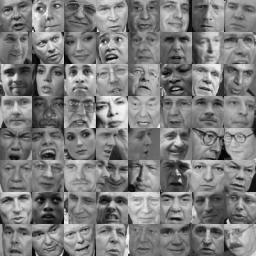

In [72]:
#show Negative images
show_array(255 * make_mosaic(X[:len(negative_paths)], 8), fmt='jpeg') # negative at the beginning

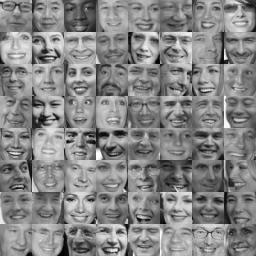

In [73]:
#show Positive images
show_array(255 * make_mosaic(X[-len(positive_paths):], 8), fmt='jpeg') # positive at the end

In [79]:
import tensorflow as tf

# Network Parameters
n_input = X.shape[1]
n_classes = 2 # (Smile vs. No Smile)
dropout = 0.75 # Dropout, probability to keep units

# Parameters
learning_rate = 0.001
training_iters = 8820
batch_size = 128
display_step = 10

training_epochs=10
# training_epochs=200

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

# Create model
def conv2d(img, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(img, w, strides=[1, 1, 1, 1], 
                                                  padding='SAME'),b))

def max_pool(img, k):
    return tf.nn.max_pool(img, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def conv_net(_X, _weights, _biases, _dropout):
    # Reshape input picture
    _X = tf.reshape(_X, shape=[-1, 32, 32, 1])

    # Convolution Layer
    conv1 = conv2d(_X, _weights['wc1'], _biases['bc1'])
    
    # Convolution Layer
    conv2 = conv2d(conv1, _weights['wc2'], _biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = max_pool(conv2, k=2)
    # Apply Dropout
    conv2 = tf.nn.dropout(conv2, _dropout)

    # Fully connected layer
    # Reshape conv2 output to fit dense layer input
    dense1 = tf.reshape(conv2, [-1, _weights['wd1'].get_shape().as_list()[0]]) 
    # Relu activation
    dense1 = tf.nn.relu(tf.add(tf.matmul(dense1, _weights['wd1']), _biases['bd1']))
    # Apply Dropout
    dense1 = tf.nn.dropout(dense1, _dropout) # Apply Dropout

    # Output, class prediction
    out = tf.add(tf.matmul(dense1, _weights['out']), _biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 9],stddev=0.01)), 
    # 5x5 conv, 32 inputs, 32 outputs
    'wc2': tf.Variable(tf.truncated_normal([3, 3, 9, 9],stddev=0.01)), 
    # fully connected, 16*16*32 inputs, 1024 outputs
    'wd1': tf.Variable(tf.truncated_normal([16*16*9, 16],stddev=0.01)), 
    # 128 inputs, 2 outputs (class prediction)
    'out': tf.Variable(tf.truncated_normal([16, n_classes])) 
}

biases = {
    'bc1': tf.Variable(tf.random_normal([9])),
    'bc2': tf.Variable(tf.random_normal([9])),
    'bd1': tf.Variable(tf.random_normal([16])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [80]:
# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
#cost = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(pred, y,pos_weight=10))
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()



In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
X_train = X_train.reshape(X_train.shape[0],1024)

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
  
    for epoch in range(training_epochs):
        step = 1
        # Keep training until reach max iterations
        while step * batch_size < training_iters:
            batch_xs, batch_ys = X_train[(batch_size*(step-1)):batch_size*(step)],y_train[(batch_size*(step-1)):batch_size*(step)]
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
            step += 1
        # Calculate batch accuracy
        if(epoch%1 == 0):
            # Calculate batch loss
            acc,conv1filter = sess.run([accuracy,weights['wc1']], feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print "Epoch " + str(epoch) + ", Minibatch Loss= " + \
                          "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc)
            
            
    print "Optimization Finished!"
    # Calculate accuracy for 256 mnist test images
    print "Testing Accuracy:", sess.run(accuracy, feed_dict={x: X_test, 
                                                                 y: y_test, 
                                                                 keep_prob: 1.})

Epoch 0, Minibatch Loss= 0.601407, Training Accuracy= 0.71094
Epoch 1, Minibatch Loss= 0.602054, Training Accuracy= 0.71094
Epoch 2, Minibatch Loss= 0.599365, Training Accuracy= 0.71094
Epoch 3, Minibatch Loss= 0.592495, Training Accuracy= 0.71094
Epoch 4, Minibatch Loss= 0.576941, Training Accuracy= 0.71094
Epoch 5, Minibatch Loss= 0.548115, Training Accuracy= 0.71094
Epoch 6, Minibatch Loss= 0.480981, Training Accuracy= 0.71875
Epoch 7, Minibatch Loss= 0.400378, Training Accuracy= 0.81250
Epoch 8, Minibatch Loss= 0.359119, Training Accuracy= 0.84375
Epoch 9, Minibatch Loss= 0.340022, Training Accuracy= 0.85156
Optimization Finished!
Testing Accuracy: 0.813971


## Using AlexNet

AlexNet is the name of a convolutional neural network running on GPUs implemented in CUDA, which competed in the ImageNet Large Scale Visual Recognition Challenge in 2012. AlexNet was designed by Alex Krizhevsky.

The Network had a very similar architecture to LeNet, but was deeper, bigger, and featured Convolutional Layers stacked on top of each other (previously it was common to only have a single CONV layer always immediately followed by a POOL layer).

<img src="images/alexnet.png" alt="" style="width: 700px;"/>

AlexNet architecture:

+ 1st layer: 96 conv filters, 11x11 + pooling + norm.
+ 2nd layer: 256 conv filters, 5x5 + pooling + norm.
+ 3rd layer: 384 conv filters, 3x3.
+ 4rd layer: 385 conv filters, 3x3.
+ 5th layer: 256 conv filters, 3x3 + pooling.
+ MLP layer: 4096 units.
+ MLP layer: 4096 units.
+ Output layer: 1000 units.


### Exercise:
What is the number of parameters of AlexNet for 220x220x3 input images?

In [6]:
### your code here



loaded 9475 negative examples
loaded 3690 positive examples
CPU times: user 10.9 s, sys: 8.33 s, total: 19.2 s
Wall time: 1min 12s


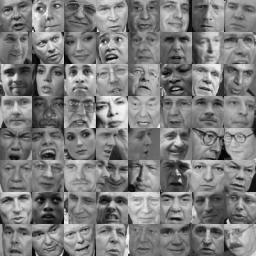

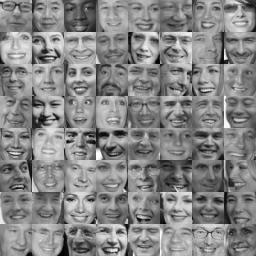

Epoch 0, Minibatch Loss= nan, Training Accuracy= nan


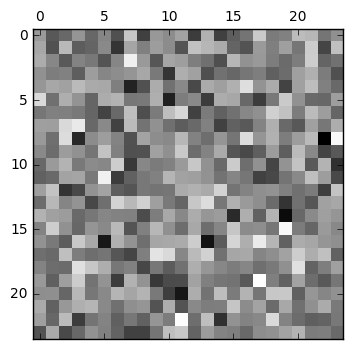

Testing Accuracy: 0.709188
Epoch 1, Minibatch Loss= nan, Training Accuracy= nan


KeyboardInterrupt: 

In [82]:
import os
import fnmatch
from cStringIO import StringIO
import numpy as np
import PIL.Image
import IPython.display
import shutil

def list_all_files(directory, extensions=None):
    for root, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            base, ext = os.path.splitext(filename)
            joined = os.path.join(root, filename)
            if extensions is None or ext.lower() in extensions:
                yield joined


def show_array(a, fmt='png', filename=None):
    a = np.uint8(np.clip(a, 0, 255))
    image_data = StringIO()
    PIL.Image.fromarray(a).save(image_data, fmt)
    if filename is None:
        IPython.display.display(IPython.display.Image(data=image_data.getvalue()))
    else:
        with open(filename, 'w') as f:
            image_data.seek(0)
            shutil.copyfileobj(image_data, f)

def find_rectangle(n, max_ratio=2):
    sides = []
    square = int(math.sqrt(n))
    for w in range(square, max_ratio * square):
        h = n / w
        used = w * h
        leftover = n - used
        sides.append((leftover, (w, h)))
    return sorted(sides)[0][1]

# should work for 1d and 2d images, assumes images are square but can be overriden
def make_mosaic(images, n=None, nx=None, ny=None, w=None, h=None):
    if n is None and nx is None and ny is None:
        nx, ny = find_rectangle(len(images))
    else:
        nx = n if nx is None else nx
        ny = n if ny is None else ny
    images = np.array(images)
    if images.ndim == 2:
        side = int(np.sqrt(len(images[0])))
        h = side if h is None else h
        w = side if w is None else w
        images = images.reshape(-1, h, w)
    else:
        h = images.shape[1]
        w = images.shape[2]
    image_gen = iter(images)
    mosaic = np.empty((h*ny, w*nx))
    for i in range(ny):
        ia = (i)*h
        ib = (i+1)*h
        for j in range(nx):
            ja = j*w
            jb = (j+1)*w
            mosaic[ia:ib, ja:jb] = next(image_gen)
    return mosaic


negative_paths = list(list_all_files('SMILEsmileD-master/SMILEs/negatives/negatives7/', ['.jpg']))
print 'loaded', len(negative_paths), 'negative examples'
positive_paths = list(list_all_files('SMILEsmileD-master/SMILEs/positives/positives7/', ['.jpg']))
print 'loaded', len(positive_paths), 'positive examples'
examples = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]


import numpy as np
from skimage.measure import block_reduce
from skimage.io import imread

def examples_to_dataset(examples, block_size=2):
    X = []
    y = []
    for path, label in examples:
        img = imread(path, as_grey=True)
        img = block_reduce(img, block_size=(block_size, block_size), func=np.mean)
        img = img.reshape((32*32))
        X.append(img)
        if(label==0):
            y.append((1,0))
        else:
            y.append((0,1))
    return np.asarray(X), np.asarray(y)

get_ipython().magic(u'time X, Y = examples_to_dataset(examples)')
X = np.asarray(X,dtype=np.float32)/ 255.
Y = np.asarray(Y,dtype=np.int32)


# Split data into train and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)


#show Negative images
show_array(255 * make_mosaic(X[:len(negative_paths)], 8), fmt='jpeg') # negative at the beginning


#show Positive images
show_array(255 * make_mosaic(X[-len(positive_paths):], 8), fmt='jpeg') # positive at the end


import tensorflow as tf

# Network Parameters
n_input = X.shape[1]
n_classes = 2 # (Smile vs. No Smile)
dropout = 0.75 # Dropout, probability to keep units

# Parameters
learning_rate = 0.001
training_samples = X.shape[0]
batch_size = 128
display_step = 10
training_epochs=50

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

# Create AlexNet model
def conv2d(name, l_input, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1], 
                                                  padding='SAME'),b), name=name)

def max_pool(name, l_input, k):
    return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1], 
                          padding='SAME', name=name)

def norm(name, l_input, lsize=4):
    return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)

def alex_net(_X, _weights, _biases, _dropout):
    # Reshape input picture
    _X = tf.reshape(_X, shape=[-1, 32, 32, 1])

    # Convolution Layer
    conv1 = conv2d('conv1', _X, _weights['wc1'], _biases['bc1'])
    # Max Pooling (down-sampling)
    pool1 = max_pool('pool1', conv1, k=2)
    # Apply Normalization
    norm1 = norm('norm1', pool1, lsize=4)
    # Apply Dropout
    norm1 = tf.nn.dropout(norm1, _dropout)

    # Convolution Layer
    conv2 = conv2d('conv2', norm1, _weights['wc2'], _biases['bc2'])
    # Max Pooling (down-sampling)
    pool2 = max_pool('pool2', conv2, k=2)
    # Apply Normalization
    norm2 = norm('norm2', pool2, lsize=4)
    # Apply Dropout
    norm2 = tf.nn.dropout(norm2, _dropout)

    # Convolution Layer
    conv3 = conv2d('conv3', norm2, _weights['wc3'], _biases['bc3'])
    # Max Pooling (down-sampling)
    pool3 = max_pool('pool3', conv3, k=2)
    # Apply Normalization
    norm3 = norm('norm3', pool3, lsize=4)
    # Apply Dropout
    norm3 = tf.nn.dropout(norm3, _dropout)

    # Fully connected layer
    # Reshape conv3 output to fit dense layer input
    dense1 = tf.reshape(norm3, [-1, _weights['wd1'].get_shape().as_list()[0]]) 
    # Relu activation
    dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1')
    
    # Relu activation
    dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2') 

    # Output, class prediction
    out = tf.matmul(dense2, _weights['out']) + _biases['out']
    return out

# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([3, 3, 1, 64],stddev=0.01)),
    'wc2': tf.Variable(tf.random_normal([3, 3, 64, 128],stddev=0.01)),
    'wc3': tf.Variable(tf.random_normal([3, 3, 128, 256],stddev=0.01)),
    'wd1': tf.Variable(tf.random_normal([4*4*256, 1024],stddev=0.01)),
    'wd2': tf.Variable(tf.random_normal([1024, 1024],stddev=0.01)),
    'out': tf.Variable(tf.random_normal([1024, 2],stddev=0.01))
}
biases = {
    'bc1': tf.Variable(tf.random_normal([64],stddev=0.01)),
    'bc2': tf.Variable(tf.random_normal([128],stddev=0.01)),
    'bc3': tf.Variable(tf.random_normal([256],stddev=0.01)),
    'bd1': tf.Variable(tf.random_normal([1024],stddev=0.01)),
    'bd2': tf.Variable(tf.random_normal([1024],stddev=0.01)),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = alex_net(x, weights, biases, keep_prob)

# Define loss and optimizer
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
cost = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(pred, y,pos_weight=10))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()

X_train = X_train.reshape(X_train.shape[0],1024)

import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
  
    for epoch in range(training_epochs):
        step = 1
        # Keep training until reach max iterations
        while step * batch_size < training_samples:
            batch_xs, batch_ys = X_train[(batch_size*(step-1)):batch_size*(step)],y_train[(batch_size*(step-1)):batch_size*(step)]
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
            step += 1
        # Calculate batch accuracy
        if(epoch%1 == 0):
            # Calculate batch loss
            acc,conv1filter = sess.run([accuracy,weights['wc1']], feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print "Epoch " + str(epoch) + ", Minibatch Loss= " +                           "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc)
        if(epoch%10 == 0):
            plt.figure()
            plt.matshow(make_mosaic(conv1filter.reshape(9,64).T, 8),cmap="gray")
            #plt.matshow(conv1filter[:,:,0,1],cmap="gray")
            plt.show()
            
            #print "Optimization Finished!"
            # Calculate accuracy for 256 mnist test images
            print "Testing Accuracy:", sess.run(accuracy, feed_dict={x: X_test, 
                                                                         y: y_test, 
                                                                         keep_prob: 1.})